# Ficha #05 - Criação automática das máscaras do dataset DRIVE

**Objectivo**: Neste trabalho usando as técnicas que julgar mais adequadas deve gerar automaticamente as máscaras do conjunto de imagens do DRIVE. A máscara permite extrair a zona central de interesse da image de fundo de olho. Na validação do seu trabalho deve sobrepor vários perfis de intensidade da máscara e da imagem de fundo de olho na direcção horizontal como na vertical.

In [30]:
%pylab inline
import sys
sys.path.append('/usr/lib/python3.6/site-packages')
import cv2
import scipy.ndimage
import numpy as np

from scipy import signal
from skimage.filters import threshold_otsu
from scipy import ndimage


Populating the interactive namespace from numpy and matplotlib


In [31]:
def grad(img):
    kernel = np.matrix('0 1 0;1 -4 1; 0 1 0')
    grad = signal.correlate2d(img, kernel, boundary='symm', mode='same')
    return grad

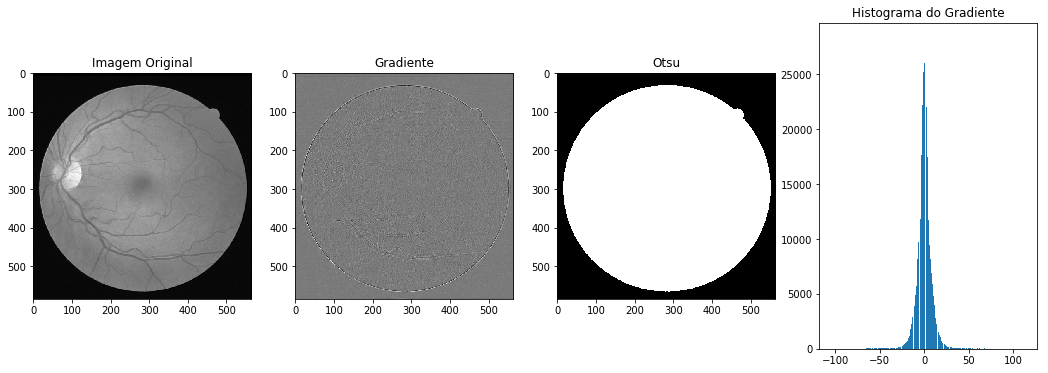

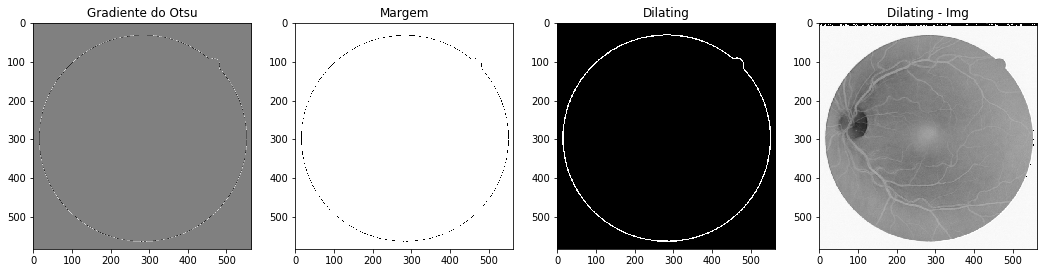

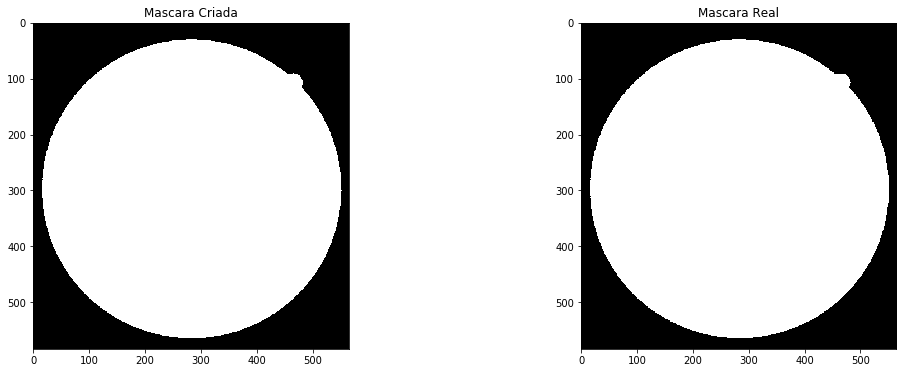

In [58]:
def grad(img):
    kernel = np.matrix('0 1 0;1 -4 1; 0 1 0')
    grad = signal.correlate2d(img, kernel, boundary='symm', mode='same')
    return grad

path = "DRIVE/test/"
img = cv2.imread(path+"images/01_test.tif",0)
finalImg = imread(path+"mask/01_test_mask.gif",0)
gray()

gradImg = grad(img)

global_thresh = threshold_otsu(img)
otsu = img > global_thresh

_,ax=subplots(1,4,figsize=(18,6))

ax[0].set_title('Imagem Original')
ax[0].imshow(img)

ax[1].set_title('Gradiente')
ax[1].imshow(gradImg)

ax[2].set_title('Otsu')
ax[2].imshow(otsu, cmap=plt.cm.gray)

ax[3].set_title('Histograma do Gradiente')
plt.hist(gradImg.ravel(),256)
plt.show()



_,ax=subplots(1,4,figsize=(18,6))

gradOt = grad(otsu)

ax[0].set_title('Gradiente do Otsu')
ax[0].imshow(gradOt)

global_thresh = threshold_otsu(gradOt)
otsu2 = gradOt > global_thresh

ax[1].set_title('Margem')
ax[1].imshow(otsu2)

a=np.ones((2,2), dtype=np.int) 
dilating = ndimage.binary_dilation(gradOt, a)

ax[2].set_title('Dilating')
ax[2].imshow(dilating)

dilatingSub = dilating - img

ax[3].set_title('Dilating - Img')
ax[3].imshow(dilatingSub)


_,ax=subplots(1,2,figsize=(18,6))


ax[0].set_title('Mascara Criada')
ax[0].imshow(otsu)
ax[1].set_title('Mascara Real')
ax[1].imshow(finalImg)

